## Modelo de regressão linear

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

In [144]:
df_pontuacao = pd.read_csv('dataset\pontuacao_teste.csv')

In [145]:
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [146]:
df_pontuacao.head()

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85


## EDA

In [147]:
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<AxesSubplot:xlabel='horas_estudo', ylabel='pontuacao_teste'>

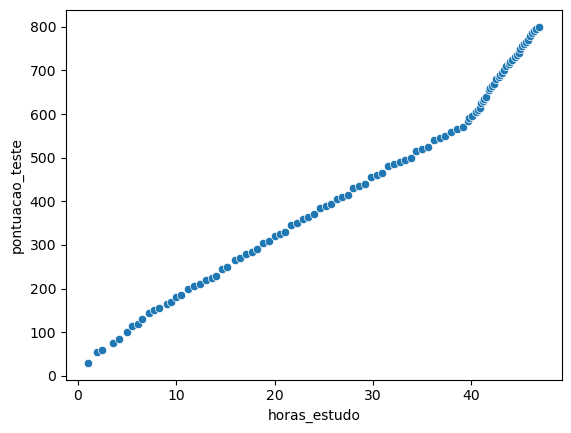

In [148]:
# Verificando a distribuição dos dados
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste' )

<AxesSubplot:ylabel='horas_estudo'>

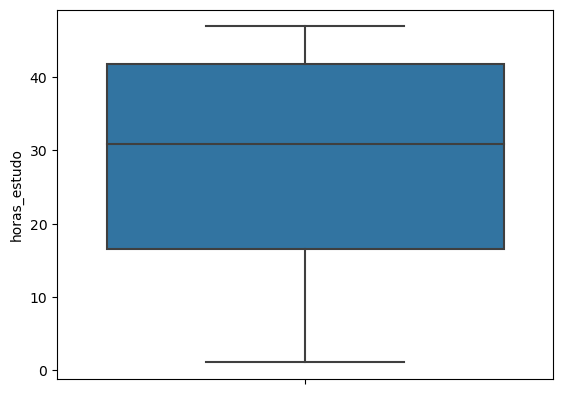

In [149]:
# outliers
sns.boxplot(data=df_pontuacao, y='horas_estudo')

<AxesSubplot:ylabel='pontuacao_teste'>

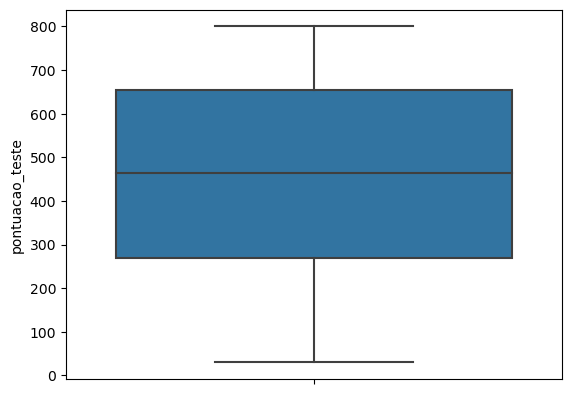

In [150]:
# outliers 
sns.boxplot(data=df_pontuacao, y='pontuacao_teste')

<AxesSubplot:>

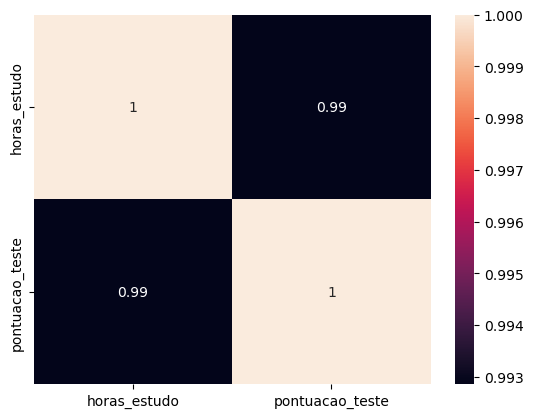

In [151]:
# corr
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

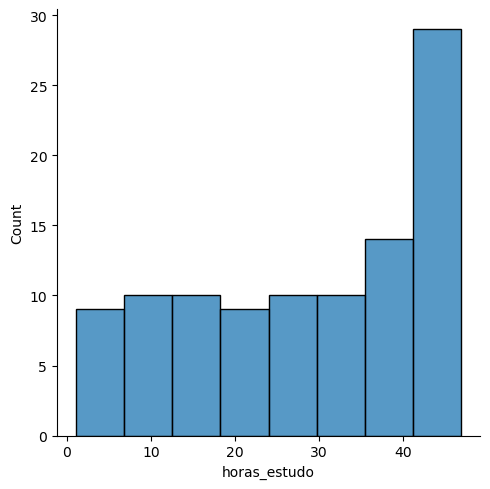

In [152]:
sns.displot(df_pontuacao, x='horas_estudo')

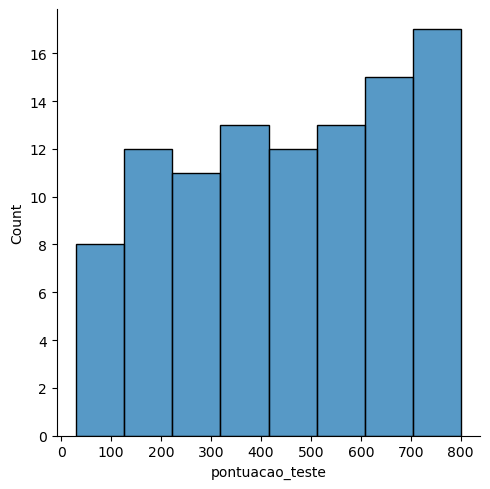

In [153]:
sns.displot(df_pontuacao, x='pontuacao_teste')

## Model

In [154]:
X = df_pontuacao['horas_estudo'].values.reshape(-1,1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [155]:
reg_model = LinearRegression()

In [156]:
reg_model.fit(X_train, y_train)

LinearRegression()

### Métricas

In [157]:
y_pred = reg_model.predict(X_test)

In [158]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_score(y_test, y_pred)

0.9828400452912442

In [159]:
mean_absolute_error(y_test, y_pred)

22.957470277134608

In [160]:
mean_squared_error(y_test, y_pred)

766.9972992416427

In [161]:
mean_squared_error(y_test, y_pred, squared=False)

27.69471608884342

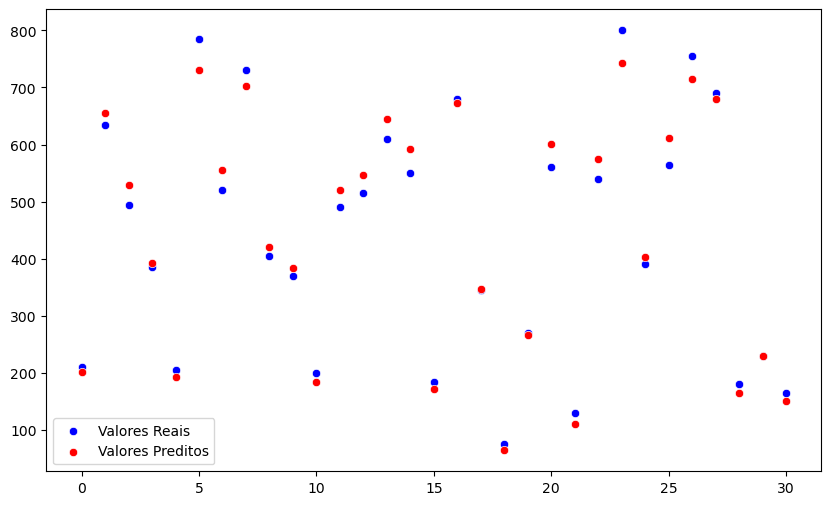

In [162]:
# Grafico de dispersão
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.legend()
plt.show()

## Análise de Resíduos

In [163]:
from scipy.stats import zscore

residuos = y_test - y_pred
residuos_std = zscore(residuos)


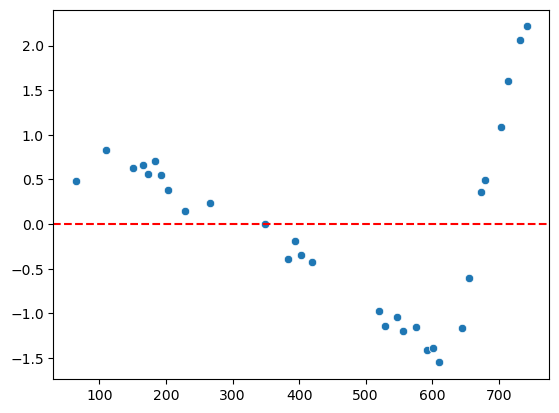

In [164]:
sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(0, color='red', linestyle='--')

Text(0, 0.5, 'Quantis Observados')

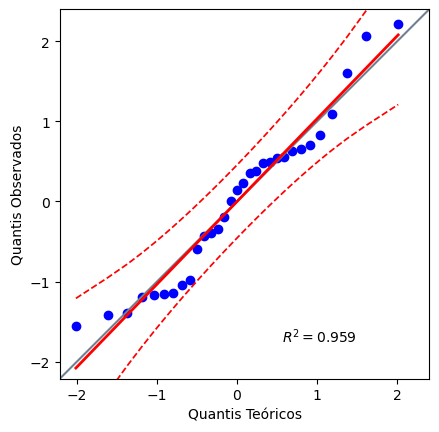

In [165]:
# qqplot
import pingouin as pg

pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Observados')

In [166]:
# Teste de Shapiro Wilk para normalidade
# h0 segue distribuição normal
# h1 não segue distribuição normal
# se p-value > 0.05 não rejeita h0

stat_shapiro, p_value_shapiro = shapiro(residuos.reshape(-1))

print(f'Estatística de teste: {stat_shapiro}, e p-valor: {p_value_shapiro}')

Estatística de teste: 0.9500530362129211, e p-valor: 0.15663613379001617


In [167]:
# Teste de kolmogorov para normalidade
# h0 segue distribuição normal
# h1 não segue distribuição normal
# se p-value > 0.05 não rejeita h0

stat_ks, p_value_ks = kstest(residuos.reshape(-1), 'norm')

print(f'Estatística de teste: {stat_ks}, e p-valor: {p_value_ks}')

Estatística de teste: 0.48355808450512827, e p-valor: 3.395368995814077e-07


## Predições

In [168]:
# Se eu estudar 30.4 horas, qual a pontuação que eu devo tirar?
reg_model.predict([[30.4]])

array([[484.01220436]])

In [169]:
# Quantas horas eu preciso estudar para tirar 600 pontos?
# y = ax + b
# x = (y - b) / a
(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

37.81485802710669

In [170]:
import joblib
joblib.dump(reg_model, 'modelo_reg_log.pkl')

['modelo_reg_log.pkl']